In [1]:
import numpy as np
import scipy 

import matplotlib.pyplot as plt
import matplotlib 

import class_diag_hamiltonian as diag_heff
import class_energy as energy
import class_mass_size as mass_size

import class_symmetry_breaking as sym_break

In [2]:
params = {"n": 256,
"M": 36,
"Mx": 6,
"converge_new_lattice": "no",
"My": 6,
"B": 1.0,
"tx": 90,
"ty": 100,
"V_0": 110.0,
"qx": 0,
"qy": 0,
"init_choice": " ",
"external_wf_tag": " ",
"excitation_no": 11,
"n_states": 0,
"path_to_input_wavefunction": " ",
"dt": 0.001,
"tol": 1e-12}

x = (2*np.pi/params["n"])*np.arange(params["n"])

Mx = params["Mx"]
My = params["My"]

n = params["n"]

tx = params["tx"]
ty = params["ty"]

B = params["B"]

scale = B 

exc_number = params["excitation_no"]

#ferro_order = np.load('matrix_results/psi_rotors_2d_python_M_10000_B_1.0_tx_90.0_ty_100.0_Vmin_10.0_Vmax_180.0/psi_rotors_2d_imag_time_prop_M_10000_Mx_100_My_100_B_1.0_tx_90.0_ty_100.0_Vmin_10.0_Vmax_180.0_qx_0_qy_0_dt_0.001_init_uniform_V0_40.0.npy')
#ref_state = np.load('matrix_results/psi_rotors_2d_python_M_36_B_1.0_tx_90.0_ty_100.0_Vmin_80.0_Vmax_80.0/psi_rotors_2d_imag_time_prop_M_36_Mx_6_My_6_B_1.0_tx_90.0_ty_100.0_Vmin_80.0_Vmax_80.0_qx_0_qy_0_dt_0.001_init_uniform_V0_80.0.npy')
#ref_state_fdv = np.load('matrix_results/psi_rotors_2d_python_M_36_B_1.0_tx_90.0_ty_100.0_Vmin_80.0_Vmax_80.0/psi_rotors_2d_imag_time_prop_M_36_Mx_6_My_6_B_1.0_tx_90.0_ty_100.0_Vmin_80.0_Vmax_80.0_qx_0_qy_0_dt_0.001_init_ferro_domain_vertical_wall_V0_80.0.npy')
#ref_state_fdh = np.load('matrix_results/psi_rotors_2d_python_M_36_B_1.0_tx_90.0_ty_100.0_Vmin_80.0_Vmax_80.0/psi_rotors_2d_imag_time_prop_M_36_Mx_6_My_6_B_1.0_tx_90.0_ty_100.0_Vmin_80.0_Vmax_80.0_qx_0_qy_0_dt_0.001_init_ferro_domain_horizontal_wall_V0_80.0.npy')
#ref_state_sp = np.load('matrix_results/psi_rotors_2d_python_M_36_B_1.0_tx_90.0_ty_100.0_Vmin_80.0_Vmax_80.0/psi_rotors_2d_imag_time_prop_M_36_Mx_6_My_6_B_1.0_tx_90.0_ty_100.0_Vmin_80.0_Vmax_80.0_qx_0_qy_0_dt_0.001_init_small_polaron_V0_80.0.npy')

ref_state = np.load('matrix_results/psi_rotors_2d_python_M_36_B_1.0_tx_90.0_ty_100.0_Vmin_110.0_Vmax_110.0/psi_rotors_2d_imag_time_prop_M_36_Mx_6_My_6_B_1.0_tx_90.0_ty_100.0_Vmin_110.0_Vmax_110.0_qx_0_qy_0_dt_0.001_init_uniform_V0_110.0.npy')
ref_state_fdv = np.load('matrix_results/psi_rotors_2d_python_M_36_B_1.0_tx_90.0_ty_100.0_Vmin_110.0_Vmax_110.0/psi_rotors_2d_imag_time_prop_M_36_Mx_6_My_6_B_1.0_tx_90.0_ty_100.0_Vmin_110.0_Vmax_110.0_qx_0_qy_0_dt_0.001_init_ferro_domain_vertical_wall_V0_110.0.npy')
ref_state_fdh = np.load('matrix_results/psi_rotors_2d_python_M_36_B_1.0_tx_90.0_ty_100.0_Vmin_110.0_Vmax_110.0/psi_rotors_2d_imag_time_prop_M_36_Mx_6_My_6_B_1.0_tx_90.0_ty_100.0_Vmin_110.0_Vmax_110.0_qx_0_qy_0_dt_0.001_init_ferro_domain_horizontal_wall_V0_110.0.npy')
ref_state_sp = np.load('matrix_results/psi_rotors_2d_python_M_36_B_1.0_tx_90.0_ty_100.0_Vmin_110.0_Vmax_110.0/psi_rotors_2d_imag_time_prop_M_36_Mx_6_My_6_B_1.0_tx_90.0_ty_100.0_Vmin_110.0_Vmax_110.0_qx_0_qy_0_dt_0.001_init_small_polaron_V0_110.0.npy')

results_path = 'image_results/MRCI_M_36_B_1.0_tx_90_ty_100_V_110/excitation_analysis/'

In [3]:
coupl_object = energy.coupling_of_states(params=params)
diag_object = diag_heff.diagonalization(params=params)
mult_ref_object = diag_heff.multi_ref_ci(params=params)

q = np.array([params['qx'],params['qy']])

''' 
- iter_number: iterations of the SCF algorithm
- mult_ref_object.set_phase_bool: whether to set the phase or not
'''
iter_number = 5
mult_ref_object.set_phase_bool = True

new_ref_gs, conv_energ_gs, overlap_arr = mult_ref_object.creat_new_ref_state(iter_number, ref_state, q)
new_ref_gs_fdv, conv_energ_gs_fdv, overlap_arr_fdv = mult_ref_object.creat_new_ref_state(iter_number, ref_state_fdv, q)
new_ref_gs_fdh, conv_energ_gs_fdh, overlap_arr_fdh = mult_ref_object.creat_new_ref_state(iter_number, ref_state_fdh, q)
new_ref_gs_sp, conv_energ_gs_sp, overlap_arr_sp = mult_ref_object.creat_new_ref_state(iter_number, ref_state_sp, q)

Iter = 0 , Overlap = (0.9999999995991636+4.944475013814152e-13j)
Iter = 1 , Overlap = (0.9999999996147673+7.399270523226022e-14j)
Iter = 2 , Overlap = (0.9999999996243711+3.5634558782732884e-14j)
Iter = 3 , Overlap = (0.9999999996347668+2.523971637669762e-14j)
Iter = 4 , Overlap = (0.9999999996440156+1.9765706323350545e-14j)
Iter = 0 , Overlap = (0.9999999997169537-1.626534936733791e-10j)
Iter = 1 , Overlap = (0.9999999997564145+4.864962265656651e-12j)
Iter = 2 , Overlap = (0.9999999997762593+5.184879832420131e-12j)
Iter = 3 , Overlap = (0.9999999998017269+3.493250554701932e-12j)
Iter = 4 , Overlap = (0.9999999998187733+2.47008415155795e-12j)
Iter = 0 , Overlap = (0.9999999996345293+3.25582414678578e-13j)
Iter = 1 , Overlap = (0.9999999996900248+3.93450646808687e-14j)
Iter = 2 , Overlap = (0.9999999997173379+1.8893069803404653e-14j)
Iter = 3 , Overlap = (0.9999999997520759+1.254390206741748e-14j)
Iter = 4 , Overlap = (0.9999999997751629+8.846471530313033e-15j)
Iter = 0 , Overlap = (0.9

In [4]:
energy_exc_states, ref_exc_states = diag_object.diag_h_eff(new_ref_gs)
energy_exc_states_fdv, ref_exc_states_fdv = diag_object.diag_h_eff(new_ref_gs_fdv)
energy_exc_states_fdh, ref_exc_states_fdh = diag_object.diag_h_eff(new_ref_gs_fdh)
energy_exc_states_sp, ref_exc_states_sp = diag_object.diag_h_eff(new_ref_gs_sp)

In [5]:
psi_arr = []

psi_arr.append(new_ref_gs)
psi_arr.append(new_ref_gs_fdv)
psi_arr.append(new_ref_gs_fdh)
psi_arr.append(new_ref_gs_sp)

psi_arr_s = []
psi_arr = mult_ref_object.append_single_excitation(new_ref_gs, psi_arr, ref_exc_states)
psi_arr = mult_ref_object.append_single_excitation(new_ref_gs_fdv, psi_arr, ref_exc_states_fdv)
psi_arr = mult_ref_object.append_single_excitation(new_ref_gs_fdh, psi_arr, ref_exc_states_fdh)
psi_arr = mult_ref_object.append_single_excitation(new_ref_gs_sp, psi_arr, ref_exc_states_sp)

psi_arr_d = []
#psi_arr_d = mult_ref_object.append_double_excitations(new_ref_gs, psi_arr_d, ref_exc_states)
#psi_arr_d = mult_ref_object.append_double_excitations(new_ref_gs_fdv, psi_arr_d, ref_exc_states_fdv)
#psi_arr_d = mult_ref_object.append_double_excitations(new_ref_gs_fdh, psi_arr_d, ref_exc_states_fdh)
#psi_arr_d = mult_ref_object.append_double_excitations(new_ref_gs_sp, psi_arr_d, ref_exc_states_sp)

n_states = len(psi_arr)
q_arr = np.zeros((n_states,2), dtype=complex)

n_states_s = len(psi_arr_s)
q_arr_s = np.zeros((n_states_s,2), dtype=complex)

n_states_d = len(psi_arr_d)
q_arr_d = np.zeros((n_states_d,2), dtype=complex)

print(n_states)
print(n_states_s)
print(n_states_d)

1444
0
0


In [16]:
coupl_indices = [365, 366, 367, 368, 371, 372, 373, 374, 377, 378, 379, 380, 383, 384, 385, 
                 386, 389, 390, 391, 392, 395, 396, 397, 398, 401, 402, 403, 404, 407, 408,
                 409, 410, 413, 414, 415, 416, 419, 420, 421, 422, 425, 426, 427, 428, 431, 
                 432, 433, 434]

psi_arr_sym_break = [psi_arr[i] for i in coupl_indices]

sym_break_object = sym_break.symm_breaking(params=params)
sym_break_object.ext_field = -0.01*np.array([5,10,5,10]) # 100*np.random.rand(4) # 1*np.array([50,50,50,50]) # np.zeros(Mx-2) #
h_eff_sym_break, s_ove_sym_break = sym_break_object.calc_mat_bulk_symm_breaking(psi_arr_sym_break, len(coupl_indices))

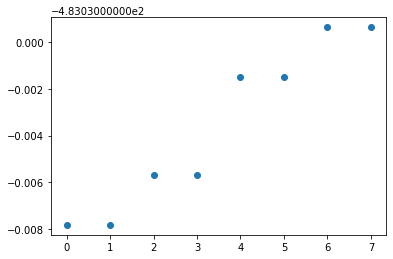

In [17]:
eigen_values_sym_break1, eigen_vector_h_sym_break1, eigen_vector_s_sym_break1 = coupl_object.diag_hamiltonian(h_eff_sym_break, s_ove_sym_break)
plt.scatter(np.arange(len(eigen_values_sym_break1[0:8])), eigen_values_sym_break1[0:8])

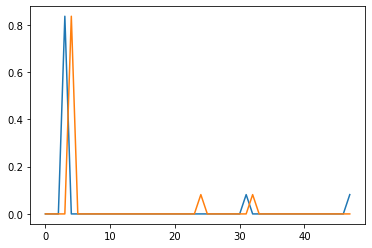

In [8]:
trans_probs = coupl_object.transition_probabilities(48, h_eff_sym_break, s_ove_sym_break)

#plt.plot(np.abs(eigen_vector_h_sym_break1[:,0]))
#plt.plot(np.abs(eigen_vector_h_sym_break1[:,5]))

%matplotlib inline
plt.plot(trans_probs[3])
plt.plot(trans_probs[4])

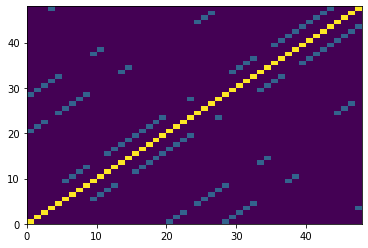

In [9]:
plt.pcolormesh(np.abs(h_eff_sym_break))

In [10]:
100*np.random.rand(4)

array([41.79333449, 78.32893503, 72.23992129, 67.52918474])

In [11]:
coupl_indices[32]

413